In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_ForeCoffe_1.csv")
df.head()

,userName,score,at,content
0,May Panjaitan,5,2024-05-30 11:01:06,gercep.. terimakasih
1,anisa sofiya,5,2024-05-30 00:58:25,kopinya enakk tempatnya buat wfc juga Rec bgtt...
2,Cita Purnamasari,5,2024-05-29 09:58:36,good
3,Azis Muslim,4,2024-05-28 22:07:28,Tampilan tidak ada menunya???
4,Rikhanatul Jannah,2,2024-05-28 09:38:07,Setelah di update aplikasi selalu keluar sendiri


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,gercep.. terimakasih,May Panjaitan,2024-05-30 11:01:06
1,kopinya enakk tempatnya buat wfc juga Rec bgtt...,anisa sofiya,2024-05-30 00:58:25
2,good,Cita Purnamasari,2024-05-29 09:58:36
3,Tampilan tidak ada menunya???,Azis Muslim,2024-05-28 22:07:28
4,Setelah di update aplikasi selalu keluar sendiri,Rikhanatul Jannah,2024-05-28 09:38:07
...,...,...,...
393,"nice coffee, nice promo",Utari Widjaja,2023-04-21 06:59:22
394,praktis,Frimukti Sibarani,2023-04-16 08:54:21
395,Percuma di hub pada hal posisi saya jauh...tak...,Ronald Gojek,2023-04-15 11:01:17
396,tempat bagus nyaman dan gratis WiFi,Pur Wono,2023-04-10 12:01:41


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   398 non-null    object
 1   userName  398 non-null    object
 2   at        398 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,398,398,398
unique,371,397,398
top,Mantap,Eko Pebriyanto,2024-05-30 11:01:06
freq,6,2,1


# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(398, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(371, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,gercep terimakasih,May Panjaitan,2024-05-30 11:01:06
1,kopinya enakk tempatnya buat wfc juga rec bgtt...,anisa sofiya,2024-05-30 00:58:25
2,good,Cita Purnamasari,2024-05-29 09:58:36
3,tampilan tidak ada menunya,Azis Muslim,2024-05-28 22:07:28
4,setelah di update aplikasi selalu keluar sendiri,Rikhanatul Jannah,2024-05-28 09:38:07
...,...,...,...
393,nice coffee nice promo,Utari Widjaja,2023-04-21 06:59:22
394,praktis,Frimukti Sibarani,2023-04-16 08:54:21
395,percuma di hub pada hal posisi saya jauhtak me...,Ronald Gojek,2023-04-15 11:01:17
396,tempat bagus nyaman dan gratis wifi,Pur Wono,2023-04-10 12:01:41


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,gercep terimakasih,May Panjaitan,2024-05-30 11:01:06
1,kopinya enakk tempatnya buat wfc juga rec sang...,anisa sofiya,2024-05-30 00:58:25
2,good,Cita Purnamasari,2024-05-29 09:58:36
3,tampilan tidak ada menunya,Azis Muslim,2024-05-28 22:07:28
4,setelah di update aplikasi selalu keluar sendiri,Rikhanatul Jannah,2024-05-28 09:38:07
...,...,...,...
393,nice coffee nice promo,Utari Widjaja,2023-04-21 06:59:22
394,praktis,Frimukti Sibarani,2023-04-16 08:54:21
395,percuma di hub pada hal posisi saya jauhtak me...,Ronald Gojek,2023-04-15 11:01:17
396,tempat bagus nyaman dan gratis wifi,Pur Wono,2023-04-10 12:01:41


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,gercep terimakasih,May Panjaitan,2024-05-30 11:01:06
1,kopinya enakk tempatnya buat wfc rec sangattt ...,anisa sofiya,2024-05-30 00:58:25
2,good,Cita Purnamasari,2024-05-29 09:58:36
3,tampilan ada menunya,Azis Muslim,2024-05-28 22:07:28
4,di update aplikasi selalu keluar sendiri,Rikhanatul Jannah,2024-05-28 09:38:07
...,...,...,...
393,nice coffee nice promo,Utari Widjaja,2023-04-21 06:59:22
394,praktis,Frimukti Sibarani,2023-04-16 08:54:21
395,percuma hub hal posisi jauhtak menghargai jadi...,Ronald Gojek,2023-04-15 11:01:17
396,tempat bagus nyaman gratis wifi,Pur Wono,2023-04-10 12:01:41


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                  [gercep, terimakasih]
1      [kopinya, enakk, tempatnya, buat, wfc, rec, sa...
2                                                 [good]
3                               [tampilan, ada, menunya]
4        [di, update, aplikasi, selalu, keluar, sendiri]
                             ...                        
393                          [nice, coffee, nice, promo]
394                                            [praktis]
395    [percuma, hub, hal, posisi, jauhtak, mengharga...
396                [tempat, bagus, nyaman, gratis, wifi]
397    [sarankan, jangan, makan, promo, fore, sunter,...
Name: content, Length: 371, dtype: object

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_ForeCoffe_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_ForeCoffe_1.csv', encoding = 'latin1')
df_clean

,content
0,gercep terimakasih
1,kopi enakk tempat buat wfc rec sangattt buat d...
2,good
3,tampil ada menu
4,di update aplikasi selalu keluar sendiri
...,...
366,nice coffee nice promo
367,praktis
368,percuma hub hal posisi jauhtak harga jadi laya...
369,tempat bagus nyaman gratis wifi


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [46]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_ForeCoffe_1.csv', encoding='latin1')

In [47]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [48]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

In [49]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,gercep terimakasih
1,kopi enakk tempat buat wfc rec sangattt buat d...
2,good
3,tampil ada menu
4,di update aplikasi selalu keluar sendiri
...,...
366,nice coffee nice promo
367,praktis
368,percuma hub hal posisi jauhtak harga jadi laya...
369,tempat bagus nyaman gratis wifi


In [50]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_ForeCoffe_1.csv')

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [51]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_ForeCoffe_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,gercep terimakasih,gercep thank you
1,1,kopi enakk tempat buat wfc rec sangattt buat d...,coffee is good for the wfc rec so much to hang...
2,2,good,good
3,3,tampil ada menu,appear menus
4,4,di update aplikasi selalu keluar sendiri,in update applications always exit by themselves
...,...,...,...
366,366,nice coffee nice promo,nice coffee nice promo
367,367,praktis,practical
368,368,percuma hub hal posisi jauhtak harga jadi laya...,It's a waste of a position. It's not worth it....
369,369,tempat bagus nyaman gratis wifi,Nice place. Home free Wi-Fi.


# **Labeling**

In [52]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_ForeCoffe_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,gercep terimakasih,gercep thank you
1,1,kopi enakk tempat buat wfc rec sangattt buat d...,coffee is good for the wfc rec so much to hang...
2,2,good,good
3,3,tampil ada menu,appear menus
4,4,di update aplikasi selalu keluar sendiri,in update applications always exit by themselves
...,...,...,...
366,366,nice coffee nice promo,nice coffee nice promo
367,367,praktis,practical
368,368,percuma hub hal posisi jauhtak harga jadi laya...,It's a waste of a position. It's not worth it....
369,369,tempat bagus nyaman gratis wifi,Nice place. Home free Wi-Fi.


In [53]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [54]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 209
Netral = 129
Negatif = 33

Total Data Seluruhnya : 371


In [56]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,gercep terimakasih,gercep thank you,Netral
1,1,kopi enakk tempat buat wfc rec sangattt buat d...,coffee is good for the wfc rec so much to hang...,Positif
2,2,good,good,Positif
3,3,tampil ada menu,appear menus,Netral
4,4,di update aplikasi selalu keluar sendiri,in update applications always exit by themselves,Netral
...,...,...,...,...
366,366,nice coffee nice promo,nice coffee nice promo,Positif
367,367,praktis,practical,Netral
368,368,percuma hub hal posisi jauhtak harga jadi laya...,It's a waste of a position. It's not worth it....,Negatif
369,369,tempat bagus nyaman gratis wifi,Nice place. Home free Wi-Fi.,Positif


In [57]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,gercep terimakasih,gercep thank you,Netral
1,kopi enakk tempat buat wfc rec sangattt buat d...,coffee is good for the wfc rec so much to hang...,Positif
2,good,good,Positif
3,tampil ada menu,appear menus,Netral
4,di update aplikasi selalu keluar sendiri,in update applications always exit by themselves,Netral
...,...,...,...
366,nice coffee nice promo,nice coffee nice promo,Positif
367,praktis,practical,Netral
368,percuma hub hal posisi jauhtak harga jadi laya...,It's a waste of a position. It's not worth it....,Negatif
369,tempat bagus nyaman gratis wifi,Nice place. Home free Wi-Fi.,Positif


# **Visualisasi**


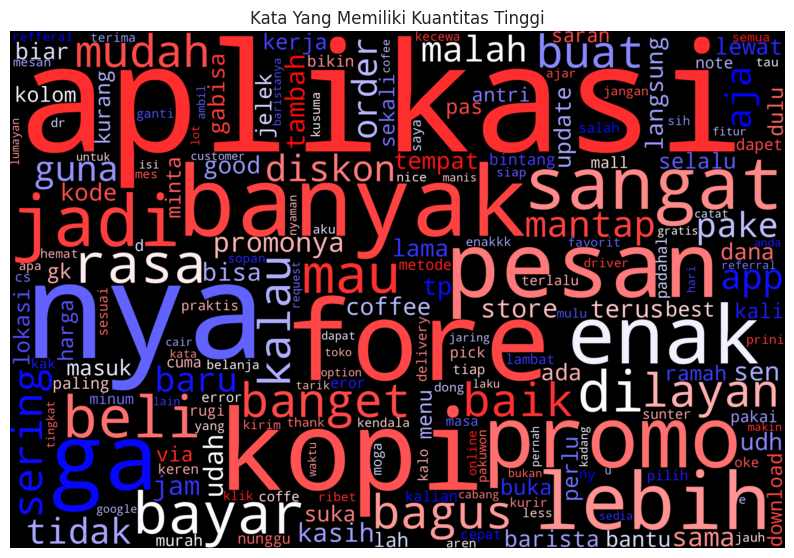

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


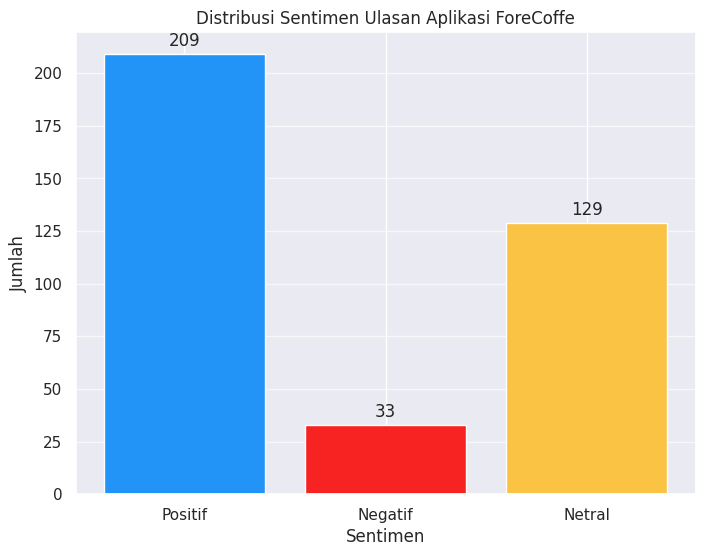

In [59]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ForeCoffe")


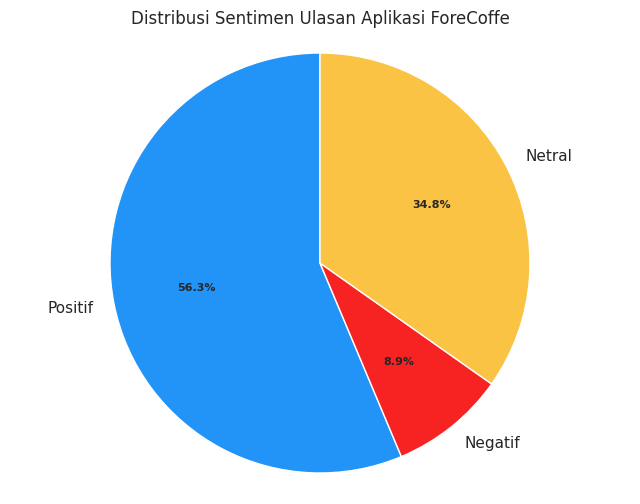

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ForeCoffe")

In [61]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,kopi enakk tempat buat wfc rec sangattt buat d...,coffee is good for the wfc rec so much to hang...,Positif
2,good,good,Positif
8,the best coffee in indonesia aplikasi mudah ga...,the best coffee in Indonesia app easily ga rib...,Positif
9,keren jadi lebih mudah sen kopi banyak vouchernya,Cool. So it's easier to get a cup of coffee. L...,Positif
11,mau aktivasi bayar lewat gopay kode otp ga mas...,Wants to activate the pay-per-view gopay no-go...,Positif
...,...,...,...
363,nyaman banget beli fore lewat aplikasi mana ba...,It's very convenient to buy fore through an ap...,Positif
366,nice coffee nice promo,nice coffee nice promo,Positif
368,percuma hub hal posisi jauhtak harga jadi laya...,It's a waste of a position. It's not worth it....,Negatif
369,tempat bagus nyaman gratis wifi,Nice place. Home free Wi-Fi.,Positif


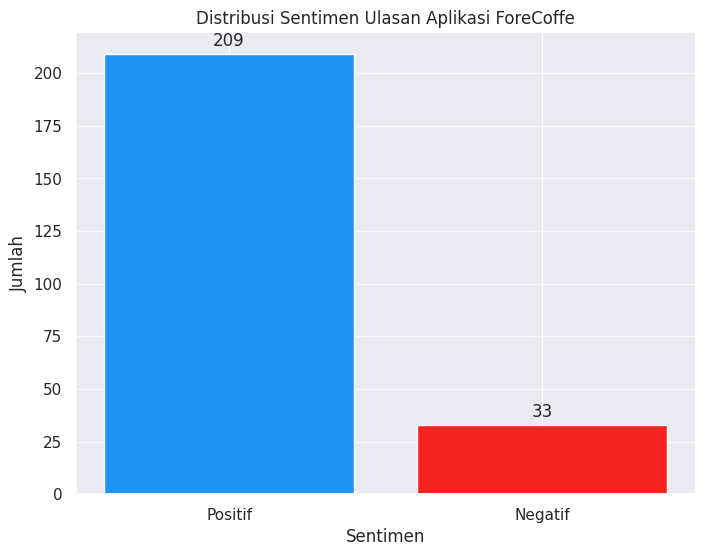

In [62]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ForeCoffe")


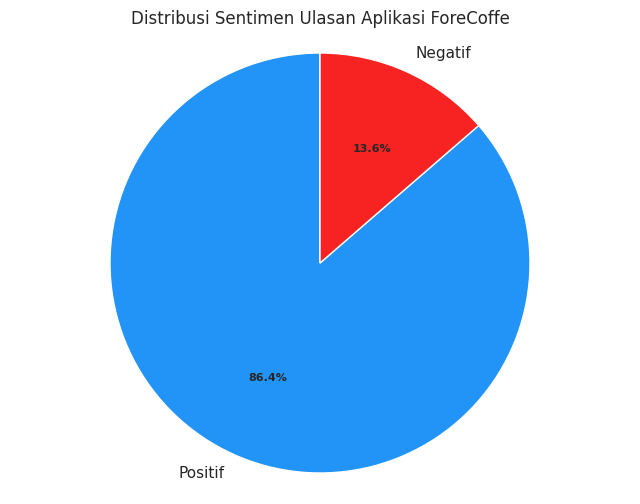

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ForeCoffe")

In [64]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,kopi enakk tempat buat wfc rec sangattt buat d...,coffee is good for the wfc rec so much to hang...,1
2,good,good,1
8,the best coffee in indonesia aplikasi mudah ga...,the best coffee in Indonesia app easily ga rib...,1
9,keren jadi lebih mudah sen kopi banyak vouchernya,Cool. So it's easier to get a cup of coffee. L...,1
11,mau aktivasi bayar lewat gopay kode otp ga mas...,Wants to activate the pay-per-view gopay no-go...,1
...,...,...,...
363,nyaman banget beli fore lewat aplikasi mana ba...,It's very convenient to buy fore through an ap...,1
366,nice coffee nice promo,nice coffee nice promo,1
368,percuma hub hal posisi jauhtak harga jadi laya...,It's a waste of a position. It's not worth it....,0
369,tempat bagus nyaman gratis wifi,Nice place. Home free Wi-Fi.,1


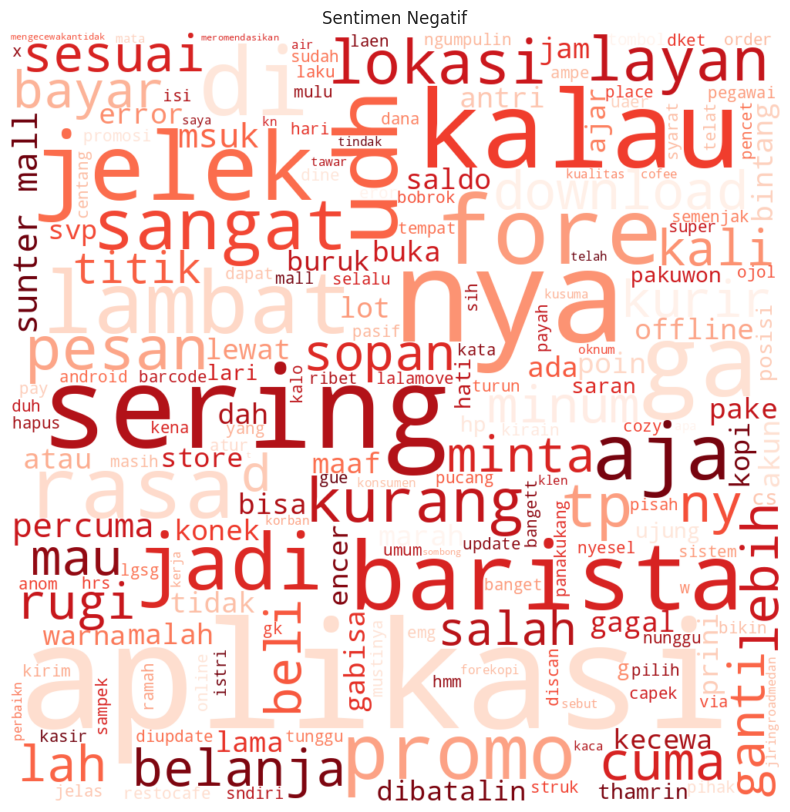

In [65]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

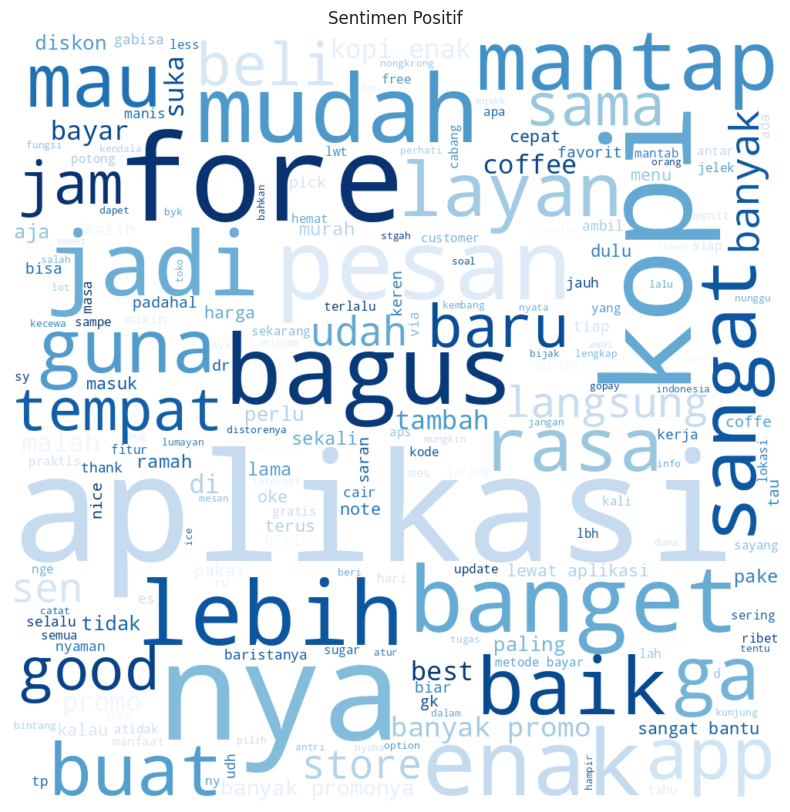

In [66]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [67]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    209
0     33
Name: count, dtype: int64

# **Data Preparation**

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [70]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [73]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

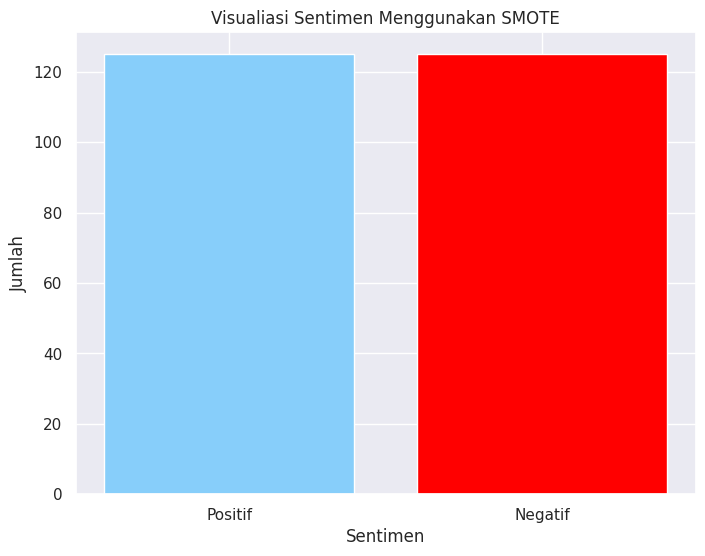

In [74]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [75]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [76]:
y_pred = naive_bayes.predict(X_test_vec)

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.845360824742268

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.44      0.54      0.48        13
     Positif       0.93      0.89      0.91        84

    accuracy                           0.85        97
   macro avg       0.68      0.72      0.70        97
weighted avg       0.86      0.85      0.85        97



In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 7  6]
 [ 9 75]]

Accuracy =  0.845360824742268


In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 7  6]
 [ 9 75]]

True Positives (TP) =  7

True Negatives (TN) =  75

False Positives (FP) =  6

False Negatives (FN) =  9

Accuracy =  0.845360824742268


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

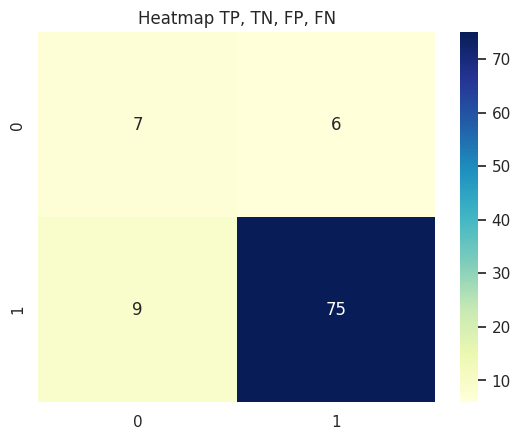

In [81]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [82]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [83]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8454


In [84]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1546


# **Testing**


In [85]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus bgt
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 76.76%
Probabilitas: 76.76117123696969 %


In [86]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jelek dan kecewa promonya cuman dikit
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 74.26%
Probabilitas: 74.26174344102434 %
